In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("community_health_MLR.csv")

In [4]:
df.head()

,yas,cinsiyet,irk,kilo,boy,visits
0,47,0,5,111.0,165.0,28
1,26,1,3,127.0,168.0,23
2,26,1,2,90.0,173.0,14
3,39,1,3,107.0,185.0,21
4,55,1,1,90.0,155.0,27


### veri düzenleme

In [5]:
df["vki"] = round(df["kilo"] / (df["boy"] / 100)**2,2)

In [6]:
df.head()

,yas,cinsiyet,irk,kilo,boy,visits,vki
0,47,0,5,111.0,165.0,28,40.77
1,26,1,3,127.0,168.0,23,45.00
2,26,1,2,90.0,173.0,14,30.07
3,39,1,3,107.0,185.0,21,31.26
4,55,1,1,90.0,155.0,27,37.46


In [7]:
df.to_csv("community_health_vki_csv" ,index=False)

<Axes: xlabel='visits', ylabel='vki'>

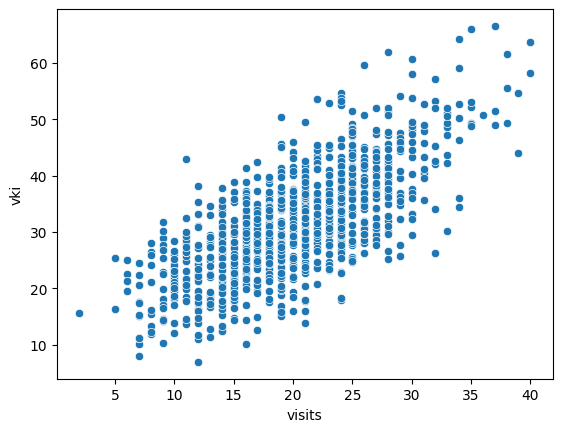

In [8]:
sns.scatterplot(data = df , x = "visits" , y = "vki")


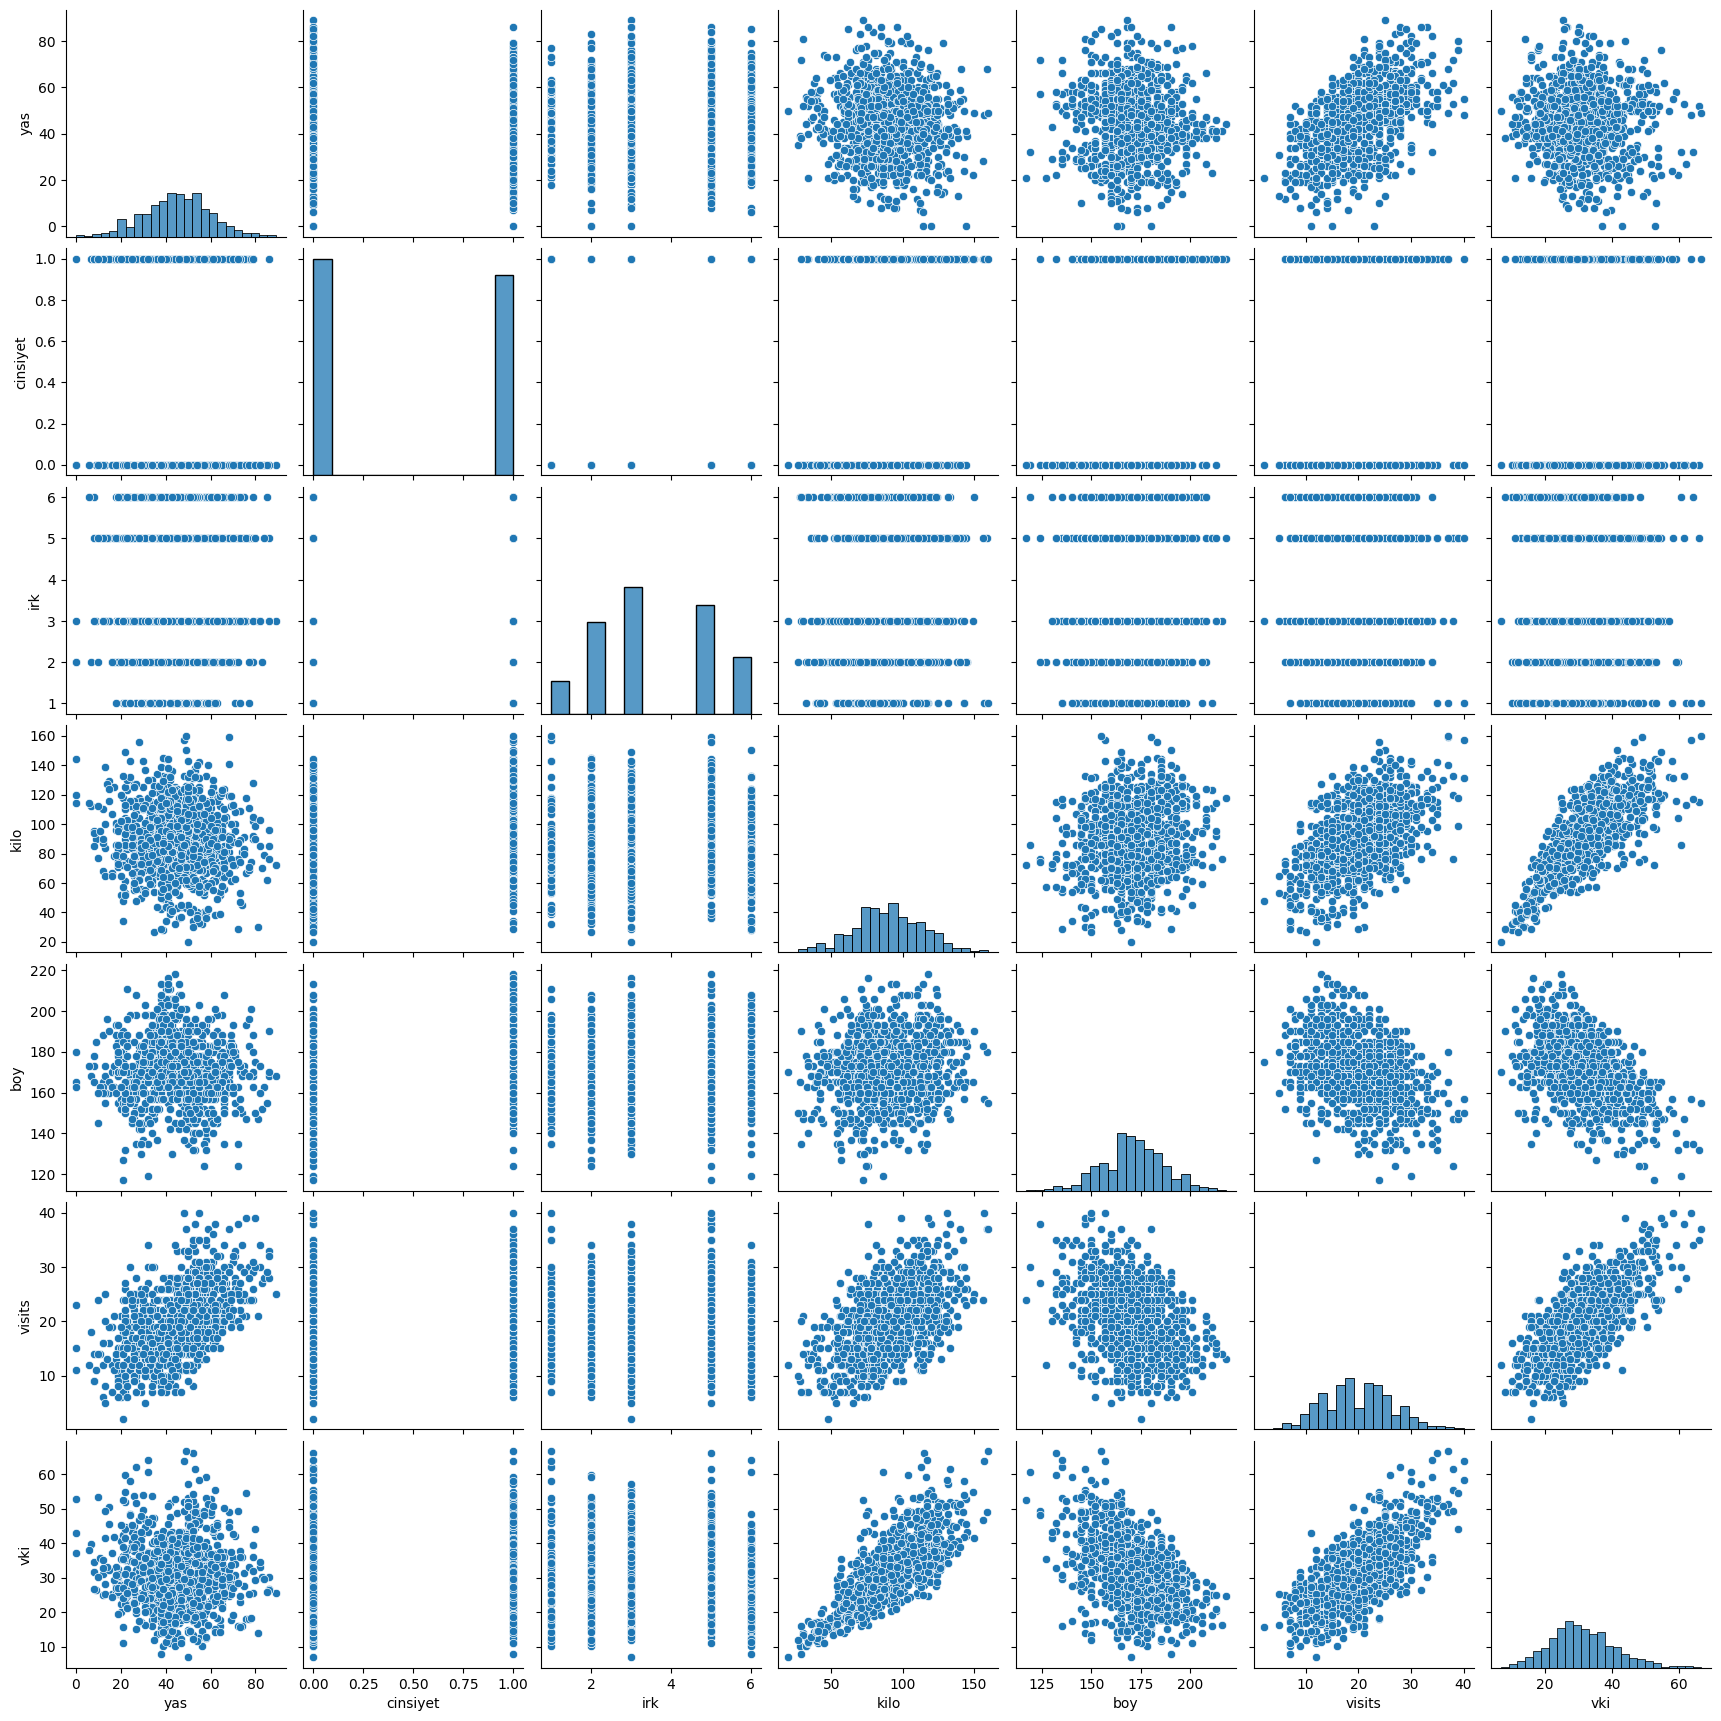

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,yas,cinsiyet,irk,kilo,boy,visits,vki
yas,1.000000,0.023866,0.013285,-0.084586,-0.063454,0.539543,-0.041481
cinsiyet,0.023866,1.000000,0.025938,0.272045,0.296501,0.066747,0.051005
irk,0.013285,0.025938,1.000000,0.032766,0.031091,0.023656,0.008410
kilo,-0.084586,0.272045,0.032766,1.000000,0.141370,0.543433,0.772455
boy,-0.063454,0.296501,0.031091,0.141370,1.000000,-0.386140,-0.493038
visits,0.539543,0.066747,0.023656,0.543433,-0.386140,1.000000,0.723839
vki,-0.041481,0.051005,0.008410,0.772455,-0.493038,0.723839,1.000000


In [11]:
X = df.drop("visits",axis=1)
y= df["visits"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regr = LinearRegression()

In [16]:
regr

LinearRegression()

In [17]:
regr.fit(X_train,y_train)

LinearRegression()

In [18]:
test_pred = regr.predict(X_test)

In [19]:
test_pred

array([25.21808447, 16.55518244, 15.56315549, 12.17964209, 28.47211525,
       12.24522893, 18.46351743, 14.63071107, 26.03434389, 16.35681297,
       13.67359355, 17.13461732, 17.23786632, 14.48052871, 28.08328889,
       11.87588795, 17.61548946, 21.53705626, 24.46179922, 12.56946296,
       11.53202548, 31.23810548, 20.12234864, 16.83995634, 22.2757921 ,
       22.69909538, 21.94280173, 14.70346738, 32.79846114, 16.15773638,
       18.0975872 , 27.98136704, 22.59867538, 30.44499887, 27.18723329,
       13.97409755, 18.22192699, 20.69690897, 10.90653765, 24.54200512,
       18.88676424, 18.44079752, 24.63261891, 20.70635079, 13.25367664,
       17.04699783, 24.60272232,  8.76242616, 19.79225914, 30.07688937,
       20.4538105 , 24.11431315, 23.23156955, 16.53118999,  8.62488403,
       17.7116862 , 14.59893256, 17.09726632, 30.57043148, 20.65074008,
       21.54180033, 18.6799951 , 13.03080846, 24.51845073, 17.80634616,
       14.47240247, 19.20219108, 13.97053358, 15.8506207 , 36.73

In [20]:
from sklearn.metrics import r2_score ,mean_absolute_error ,mean_squared_error

In [22]:
regr.coef_

array([ 0.24776015,  0.09238417,  0.04300895,  0.01348066, -0.00109023,
        0.46886866])

In [24]:
coaf_df = pd.DataFrame(regr.coef_,X.columns,columns=["katsayılar"])

In [26]:
coaf_df

,katsayılar
yas,0.247760
cinsiyet,0.092384
irk,0.043009
kilo,0.013481
boy,-0.001090
vki,0.468869


In [28]:
doki = [[25,1,1,80,187,30]]

In [29]:
regr.predict(doki)

c:\Users\bilal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.16840217])